In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':60})

In [2]:
pth = r"/Users/christianugwu/Downloads/Aqua_Data_Clarias.xlsx"

In [3]:
earthen_data = pd.read_excel(pth, sheet_name='EarthenData')

In [4]:
earthen_data.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
0,4.31,26.3,7.05,35.092826,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,25.092826
1,5.12,26.4,7.07,62.092826,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,49.092826
2,5.35,26.2,7.01,86.185652,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,74.185652
3,4.91,26.5,7.11,139.278478,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,123.278478
4,4.77,25.1,7.04,215.464130,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9,197.464130


In [5]:
earthen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dissolve_oxygen   39 non-null     float64
 1   Temperature       39 non-null     float64
 2   PH                39 non-null     float64
 3   Feed_intake       39 non-null     float64
 4   Fish_meal         39 non-null     float64
 5   Blood_meal        39 non-null     float64
 6   Palm_kernel_cake  39 non-null     int64  
 7   Water_fern        39 non-null     int64  
 8   Wheat_meal        39 non-null     int64  
 9   Mopane_worm       39 non-null     int64  
 10  Soya_bean_meal    39 non-null     float64
 11  Yellow_maize      39 non-null     float64
 12  Soya_bean_oil     39 non-null     int64  
 13  Starch            39 non-null     int64  
 14  Vitamin           39 non-null     int64  
 15  Methionine        39 non-null     int64  
 16  Lysine            39 non-null     int64  
 17 

In [6]:
earthen_data.describe()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.000000,39.000000
mean,5.067949,26.194872,7.069231,353.203103,3.633333,10.833333,4.333333,3.000000,6.333333,6.666667,16.600000,25.300000,5.333333,2.0,2.0,3.333333,3.333333,7.300000,330.023616
std,0.299510,0.625741,0.042512,230.372693,5.205480,15.520925,6.208370,4.298102,9.073772,9.551339,13.568617,0.894721,0.477567,0.0,0.0,2.387835,2.387835,10.458716,221.823777
min,4.310000,25.100000,7.010000,34.807600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,24.807600
25%,4.790000,25.700000,7.040000,138.504100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,5.000000,2.0,2.0,0.000000,0.000000,0.000000,122.504100
50%,5.130000,26.400000,7.070000,347.653200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,5.000000,2.0,2.0,5.000000,5.000000,0.000000,315.032600
75%,5.315000,26.650000,7.110000,561.521500,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,531.521500
max,5.610000,27.700000,7.140000,747.568200,10.900000,32.500000,13.000000,9.000000,19.000000,20.000000,32.800000,26.500000,6.000000,2.0,2.0,5.000000,5.000000,21.900000,713.568200


In [7]:
def boxplot(column):
    sns.boxplot(data= earthen_data,x=earthen_data[f"{column}"])
    plt.title(f"Boxplot of Earthen Data {column}")
    plt.show()

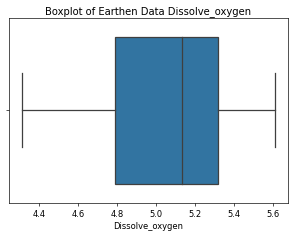

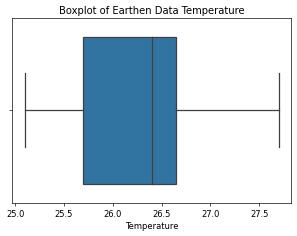

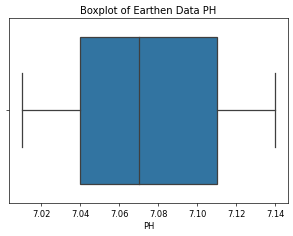

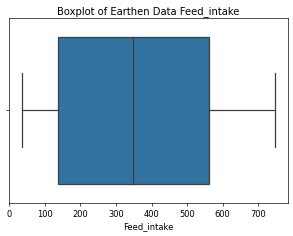

In [8]:
boxplot('Dissolve_oxygen')
boxplot('Temperature')
boxplot('PH')
boxplot('Feed_intake')

In [9]:
def histgram(column):
    #sns.histplot(data2["price"],kde=True)
    sns.histplot(data= earthen_data,x=earthen_data[f"{column}"], kde = True)
    plt.title(f"Histgram plot of Earthen Data {column}")
    plt.show()

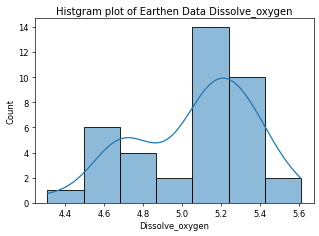

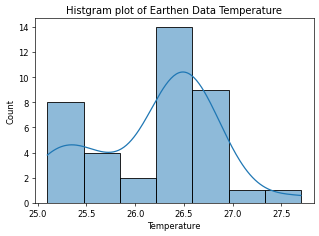

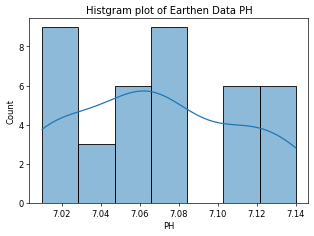

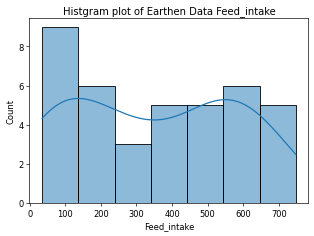

In [10]:
histgram('Dissolve_oxygen')
histgram('Temperature')
histgram('PH')
histgram('Feed_intake')

In [11]:
# skewness along the index axis 
earthen_data.skew(axis = 0, skipna = True) 

Dissolve_oxygen    -0.547756
Temperature        -0.281343
PH                  0.160116
Feed_intake         0.048219
Fish_meal           0.735711
Blood_meal          0.735711
Palm_kernel_cake    0.735711
Water_fern          0.735711
Wheat_meal          0.735711
Mopane_worm         0.735711
Soya_bean_meal     -0.046582
Yellow_maize        0.489357
Soya_bean_oil       0.735711
Starch              0.000000
Vitamin             0.000000
Methionine         -0.735711
Lysine             -0.735711
Groundnut_cake      0.735711
Weight_gain         0.051105
dtype: float64

In [12]:
# Calculate the correlation matrix
correlation_matrix = earthen_data.corr()
correlation_matrix

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake,Weight_gain
Dissolve_oxygen,1.000000,-0.165044,-4.146253e-02,0.029898,9.689620e-02,3.397500e-01,3.397500e-01,3.397500e-01,-4.366462e-01,-4.366462e-01,-1.494014e-01,2.409861e-01,9.689620e-02,NaN,NaN,-9.689620e-02,-9.689620e-02,9.689620e-02,0.026307
Temperature,-0.165044,1.000000,-1.119380e-01,0.143201,2.348314e-02,-3.904072e-01,-3.904072e-01,-3.904072e-01,3.669241e-01,3.669241e-01,2.466551e-01,-3.200966e-01,2.348314e-02,NaN,NaN,-2.348314e-02,-2.348314e-02,2.348314e-02,0.148467
PH,-0.041463,-0.111938,1.000000e+00,-0.147618,3.144080e-15,-7.818435e-15,-7.822227e-15,-7.801369e-15,4.652476e-15,4.680821e-15,6.418531e-15,-7.157793e-15,3.258675e-15,NaN,NaN,-3.164833e-15,-3.164833e-15,3.122003e-15,-0.152401
Feed_intake,0.029898,0.143201,-1.476181e-01,1.000000,-4.878958e-02,9.961303e-02,9.961303e-02,9.961303e-02,-5.082346e-02,-5.082346e-02,-8.673446e-02,9.537943e-02,-4.878958e-02,NaN,NaN,4.878958e-02,4.878958e-02,-4.878958e-02,0.999720
Fish_meal,0.096896,0.023483,3.144080e-15,-0.048790,1.000000e+00,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,8.552733e-01,-7.205767e-01,1.000000e+00,NaN,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,-0.048103
Blood_meal,0.339750,-0.390407,-7.818435e-15,0.099613,-5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,-5.000000e-01,-5.000000e-01,-8.763912e-01,9.607689e-01,-5.000000e-01,NaN,NaN,5.000000e-01,5.000000e-01,-5.000000e-01,0.098070
Palm_kernel_cake,0.339750,-0.390407,-7.822227e-15,0.099613,-5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,-5.000000e-01,-5.000000e-01,-8.763912e-01,9.607689e-01,-5.000000e-01,NaN,NaN,5.000000e-01,5.000000e-01,-5.000000e-01,0.098070
Water_fern,0.339750,-0.390407,-7.801369e-15,0.099613,-5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,-5.000000e-01,-5.000000e-01,-8.763912e-01,9.607689e-01,-5.000000e-01,NaN,NaN,5.000000e-01,5.000000e-01,-5.000000e-01,0.098070
Wheat_meal,-0.436646,0.366924,4.652476e-15,-0.050823,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,1.000000e+00,1.000000e+00,2.111786e-02,-2.401922e-01,-5.000000e-01,NaN,NaN,5.000000e-01,5.000000e-01,-5.000000e-01,-0.049967
Mopane_worm,-0.436646,0.366924,4.680821e-15,-0.050823,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,1.000000e+00,1.000000e+00,2.111786e-02,-2.401922e-01,-5.000000e-01,NaN,NaN,5.000000e-01,5.000000e-01,-5.000000e-01,-0.049967


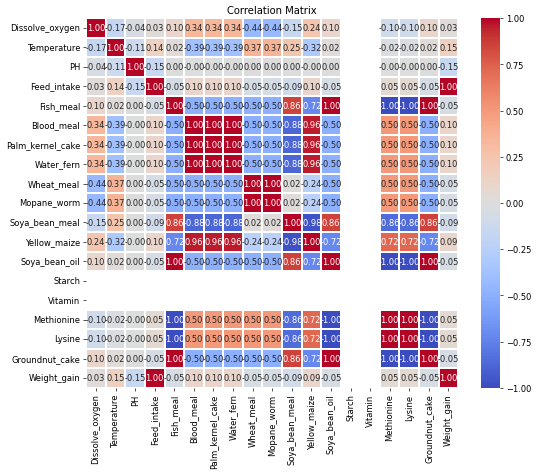

In [13]:
# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix') 
# displaying heatmap 
plt.show() 

### Descriptive Analysis Inference
1. The highest weight gain is 713.568200.
2. The lowest weight gain is 24.807600.
3. The total number of observations is 39 with no missing value.
4. Most of the weight fall in the range of 0 to 100.
5. Average weight is 330.02.
6. The temperature range from 25 to 27 and the median was 26.4
7. Most of the temperature fall in the range of 26.4 and 26.7.
8. From above box plot its clear that there is no outlier in 'Weight_gain'  and 'temperature' data
9. There is high correlation between weight_gain and feed intake which is 0.9997.
10. The highest feed intake was 747.57 and the lowest was 34.8
11. Average dissolve oxygen was 5.13, the highest was 5.61 and lowest was 4.31

### Predictive Analysis

In [14]:
features = earthen_data.drop(['Weight_gain'], axis =1)
features.head()

,Dissolve_oxygen,Temperature,PH,Feed_intake,Fish_meal,Blood_meal,Palm_kernel_cake,Water_fern,Wheat_meal,Mopane_worm,Soya_bean_meal,Yellow_maize,Soya_bean_oil,Starch,Vitamin,Methionine,Lysine,Groundnut_cake
0,4.31,26.3,7.05,35.092826,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
1,5.12,26.4,7.07,62.092826,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
2,5.35,26.2,7.01,86.185652,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
3,4.91,26.5,7.11,139.278478,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9
4,4.77,25.1,7.04,215.464130,10.9,0.0,0,0,0,0,32.8,24.4,6,2,2,0,0,21.9


In [15]:
label = earthen_data[['Weight_gain']]
label.head()

,Weight_gain
0,25.092826
1,49.092826
2,74.185652
3,123.278478
4,197.464130


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(features, label, test_size =0.2, random_state = 42) 

print('X_train dimension', X_train.shape)
print('X_test dimension', X_test.shape)
print('y_train dimension', y_train.shape)
print('y_test dimension', y_test.shape)

X_train dimension (31, 18)
X_test dimension (8, 18)
y_train dimension (31, 1)
y_test dimension (8, 1)


In [17]:
X_text_df = pd.DataFrame(X_test)
y_text_df = pd.DataFrame(y_test)
y_text_df

,Weight_gain
33,414.463400
36,531.463400
4,197.464130
13,24.861800
30,196.038000
26,24.807600
6,316.649783
27,48.807600


#### Linear Regression

In [18]:
from sklearn import linear_model
model_reg = linear_model.LinearRegression()
# Train the Linear regression model
model_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the test set
y_pred = model_reg.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the model coefficients and evaluation metrics
print(f'Coefficients: {model_reg.coef_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Coefficients: [[-2.85075435e+00  2.76693496e+00 -1.58982339e+01  9.61174445e-01
   1.54614496e-02  2.73913474e-02  1.09565390e-02  7.58529621e-03
  -4.29645538e-02 -4.52258461e-02  8.08422781e-03  4.13127065e-04
   1.41848162e-03  0.00000000e+00  0.00000000e+00 -7.09240808e-03
  -7.09240808e-03  3.10647474e-02]]
Mean Squared Error: 15.372918142842225
R-squared: 0.9995095004667367


In [21]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
#print(predicted)
predicted.rename(columns={0:'Linear Regression Prediction'}, inplace=True)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Linear Regression Prediction
0   414.463400                    409.265316
1   531.463400                    530.900699
2   197.464130                    196.832766
3    24.861800                     23.632764
4   196.038000                    193.903252
5    24.807600                     25.059520
6   316.649783                    326.007439
7    48.807600                     47.562156


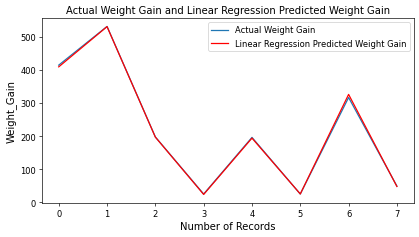

In [22]:
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Linear Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Linear Regression Prediction'],'r')
plt.legend(['Actual Weight Gain','Linear Regression Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [23]:
# Create and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=30)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=30)

In [24]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 284.7545300290738
R-squared: 0.9909144143762377


In [25]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = regressor.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'Descision Tree Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  Descision Tree Regressor Prediction
0   414.463400                           451.579600
1   531.463400                           513.568200
2   197.464130                           196.309000
3    24.861800                            48.861800
4   196.038000                           196.309000
5    24.807600                            25.092826
6   316.649783                           315.032600
7    48.807600                            49.092826


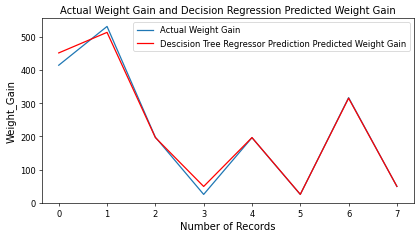

In [26]:
# visualize result of Decision Tree Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and Decision Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['Descision Tree Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','Descision Tree Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [60]:
### Create a Pickle file
import pickle
pickle_out = open("DT_Clarias_Earthen.pkl","wb")
pickle.dump(regressor, pickle_out)
pickle_out.close()

In [27]:
# Create and train the K-Nearest Neighbors Regression model
knn_reg = KNeighborsRegressor(n_neighbors=5) 
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 508.3429994187497
R-squared: 0.9837804376738531


In [28]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = knn_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'KNN Regressor Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  KNN Regressor Prediction
0   414.463400                458.133120
1   531.463400                530.328560
2   197.464130                208.879722
3    24.861800                 54.077250
4   196.038000                208.708586
5    24.807600                 54.169661
6   316.649783                305.553506
7    48.807600                 54.169661


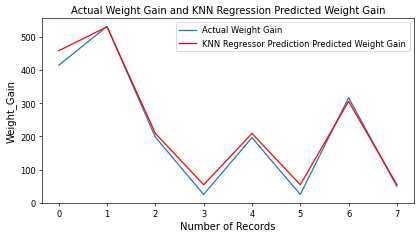

In [30]:
# visualize result of KNN Regressor prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and KNN Regression Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['KNN Regressor Prediction'],'r')
plt.legend(['Actual Weight Gain','KNN Regressor Prediction Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [33]:
import warnings
warnings.filterwarnings("ignore")
# Create and train the MLP Regression model
ann_reg = MLPRegressor(hidden_layer_sizes= (50,), random_state=42,
                       alpha = 0.0005, activation = 'relu', 
                       solver = 'adam', max_iter= 10000)

ann_reg.fit(X_train, y_train)

MLPRegressor(alpha=0.0005, hidden_layer_sizes=(50,), max_iter=10000,
             random_state=42)

In [34]:
# Make predictions on the test set
y_pred = ann_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.858837204075288
R-squared: 0.9997811569400118


In [35]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= ann_reg.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= ann_reg.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error for Training:  4.261578665444276
mean_squared_error for Testing:  2.6189381825608806


In [36]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = ann_reg.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

   Weight_gain  ANN Prediction
0   414.463400      411.199882
1   531.463400      531.832248
2   197.464130      196.756086
3    24.861800       20.901566
4   196.038000      193.405080
5    24.807600       24.957227
6   316.649783      321.216236
7    48.807600       48.504013


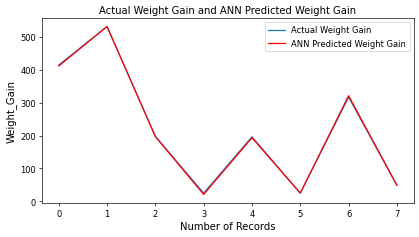

In [37]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()

In [38]:
# Save
import pickle
pickle_out = open("ANN_Clarias_Earthen_ext.pkl","wb")
pickle.dump(ann_reg, pickle_out)
pickle_out.close()

In [29]:
from keras.models import Sequential
from keras.layers import Dense# Neural network
model = Sequential()
model.add(Dense(500, input_dim=4, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(X_train, y_train, batch_size = 1, validation_split=0.2, epochs= 3000)

Epoch 1/3000
24/24 [==============================] - 0s 4ms/step - loss: 66725.0078 - mean_squared_error: 66725.0078 - val_loss: 1185.4901 - val_mean_squared_error: 1185.4901
Epoch 2/3000
24/24 [==============================] - 0s 1ms/step - loss: 3521.6199 - mean_squared_error: 3521.6199 - val_loss: 1425.5208 - val_mean_squared_error: 1425.5208
Epoch 3/3000
24/24 [==============================] - 0s 1ms/step - loss: 383.2795 - mean_squared_error: 383.2795 - val_loss: 103.6791 - val_mean_squared_error: 103.6791
Epoch 4/3000
24/24 [==============================] - 0s 1ms/step - loss: 234.3673 - mean_squared_error: 234.3673 - val_loss: 151.6797 - val_mean_squared_error: 151.6797
Epoch 5/3000
24/24 [==============================] - 0s 1ms/step - loss: 103.1031 - mean_squared_error: 103.1031 - val_loss: 10.0367 - val_mean_squared_error: 10.0367
Epoch 6/3000
24/24 [==============================] - 0s 1ms/step - loss: 58.2895 - mean_squared_error: 58.2895 - val_loss: 60.9730 - val_mean

Epoch 50/3000
24/24 [==============================] - 0s 1ms/step - loss: 101.2184 - mean_squared_error: 101.2184 - val_loss: 6.1551 - val_mean_squared_error: 6.1551
Epoch 51/3000
24/24 [==============================] - 0s 1ms/step - loss: 109.2849 - mean_squared_error: 109.2849 - val_loss: 14.4025 - val_mean_squared_error: 14.4025
Epoch 52/3000
24/24 [==============================] - 0s 1ms/step - loss: 167.6140 - mean_squared_error: 167.6140 - val_loss: 192.3039 - val_mean_squared_error: 192.3039
Epoch 53/3000
24/24 [==============================] - 0s 1ms/step - loss: 104.4688 - mean_squared_error: 104.4688 - val_loss: 165.2718 - val_mean_squared_error: 165.2718
Epoch 54/3000
24/24 [==============================] - 0s 1ms/step - loss: 124.1257 - mean_squared_error: 124.1257 - val_loss: 7.5276 - val_mean_squared_error: 7.5276
Epoch 55/3000
24/24 [==============================] - 0s 1ms/step - loss: 72.3705 - mean_squared_error: 72.3705 - val_loss: 5.1363 - val_mean_squared_erro

24/24 [==============================] - 0s 1ms/step - loss: 29.1105 - mean_squared_error: 29.1105 - val_loss: 85.6970 - val_mean_squared_error: 85.6970
Epoch 147/3000
24/24 [==============================] - 0s 1ms/step - loss: 214.4207 - mean_squared_error: 214.4207 - val_loss: 31.5991 - val_mean_squared_error: 31.5991
Epoch 148/3000
24/24 [==============================] - 0s 1ms/step - loss: 247.7804 - mean_squared_error: 247.7804 - val_loss: 380.2075 - val_mean_squared_error: 380.2075
Epoch 149/3000
24/24 [==============================] - 0s 1ms/step - loss: 230.8152 - mean_squared_error: 230.8152 - val_loss: 102.3666 - val_mean_squared_error: 102.3666
Epoch 150/3000
24/24 [==============================] - 0s 1ms/step - loss: 104.9787 - mean_squared_error: 104.9787 - val_loss: 34.0441 - val_mean_squared_error: 34.0441
Epoch 151/3000
24/24 [==============================] - 0s 1ms/step - loss: 227.0925 - mean_squared_error: 227.0925 - val_loss: 6.3469 - val_mean_squared_error: 6.

24/24 [==============================] - 0s 1ms/step - loss: 123.9241 - mean_squared_error: 123.9241 - val_loss: 47.8327 - val_mean_squared_error: 47.8327
Epoch 243/3000
24/24 [==============================] - 0s 1ms/step - loss: 57.5874 - mean_squared_error: 57.5874 - val_loss: 11.8729 - val_mean_squared_error: 11.8729
Epoch 244/3000
24/24 [==============================] - 0s 1ms/step - loss: 185.9371 - mean_squared_error: 185.9371 - val_loss: 79.7592 - val_mean_squared_error: 79.7592
Epoch 245/3000
24/24 [==============================] - 0s 2ms/step - loss: 94.8791 - mean_squared_error: 94.8791 - val_loss: 188.0181 - val_mean_squared_error: 188.0181
Epoch 246/3000
24/24 [==============================] - 0s 1ms/step - loss: 109.1459 - mean_squared_error: 109.1459 - val_loss: 342.3605 - val_mean_squared_error: 342.3605
Epoch 247/3000
24/24 [==============================] - 0s 1ms/step - loss: 122.3016 - mean_squared_error: 122.3016 - val_loss: 9.9484 - val_mean_squared_error: 9.94

24/24 [==============================] - 0s 1ms/step - loss: 206.6939 - mean_squared_error: 206.6939 - val_loss: 85.4972 - val_mean_squared_error: 85.4972
Epoch 339/3000
24/24 [==============================] - 0s 1ms/step - loss: 185.9614 - mean_squared_error: 185.9614 - val_loss: 336.3661 - val_mean_squared_error: 336.3661
Epoch 340/3000
24/24 [==============================] - 0s 1ms/step - loss: 113.0549 - mean_squared_error: 113.0549 - val_loss: 16.1941 - val_mean_squared_error: 16.1941
Epoch 341/3000
24/24 [==============================] - 0s 1ms/step - loss: 159.0179 - mean_squared_error: 159.0179 - val_loss: 63.4808 - val_mean_squared_error: 63.4808
Epoch 342/3000
24/24 [==============================] - 0s 1ms/step - loss: 118.5644 - mean_squared_error: 118.5644 - val_loss: 40.5293 - val_mean_squared_error: 40.5293
Epoch 343/3000
24/24 [==============================] - 0s 1ms/step - loss: 76.8709 - mean_squared_error: 76.8709 - val_loss: 114.5298 - val_mean_squared_error: 11

24/24 [==============================] - 0s 1ms/step - loss: 135.9814 - mean_squared_error: 135.9814 - val_loss: 61.4263 - val_mean_squared_error: 61.4263
Epoch 435/3000
24/24 [==============================] - 0s 1ms/step - loss: 79.1903 - mean_squared_error: 79.1903 - val_loss: 25.6517 - val_mean_squared_error: 25.6517
Epoch 436/3000
24/24 [==============================] - 0s 1ms/step - loss: 67.6892 - mean_squared_error: 67.6892 - val_loss: 23.4062 - val_mean_squared_error: 23.4062
Epoch 437/3000
24/24 [==============================] - 0s 1ms/step - loss: 44.6478 - mean_squared_error: 44.6478 - val_loss: 8.2874 - val_mean_squared_error: 8.2874
Epoch 438/3000
24/24 [==============================] - 0s 1ms/step - loss: 125.1339 - mean_squared_error: 125.1339 - val_loss: 10.9261 - val_mean_squared_error: 10.9261
Epoch 439/3000
24/24 [==============================] - 0s 1ms/step - loss: 81.5120 - mean_squared_error: 81.5120 - val_loss: 84.1778 - val_mean_squared_error: 84.1778
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 102.7284 - mean_squared_error: 102.7284 - val_loss: 225.9690 - val_mean_squared_error: 225.9690
Epoch 531/3000
24/24 [==============================] - 0s 1ms/step - loss: 139.9724 - mean_squared_error: 139.9724 - val_loss: 16.4344 - val_mean_squared_error: 16.4344
Epoch 532/3000
24/24 [==============================] - 0s 1ms/step - loss: 183.2316 - mean_squared_error: 183.2316 - val_loss: 110.0866 - val_mean_squared_error: 110.0866
Epoch 533/3000
24/24 [==============================] - 0s 1ms/step - loss: 60.3638 - mean_squared_error: 60.3638 - val_loss: 52.5005 - val_mean_squared_error: 52.5005
Epoch 534/3000
24/24 [==============================] - 0s 1ms/step - loss: 52.0329 - mean_squared_error: 52.0329 - val_loss: 107.7299 - val_mean_squared_error: 107.7299
Epoch 535/3000
24/24 [==============================] - 0s 1ms/step - loss: 135.7559 - mean_squared_error: 135.7559 - val_loss: 25.9786 - val_mean_squared_error: 2

24/24 [==============================] - 0s 1ms/step - loss: 59.3955 - mean_squared_error: 59.3955 - val_loss: 18.5125 - val_mean_squared_error: 18.5125
Epoch 627/3000
24/24 [==============================] - 0s 1ms/step - loss: 158.6773 - mean_squared_error: 158.6773 - val_loss: 721.6335 - val_mean_squared_error: 721.6335
Epoch 628/3000
24/24 [==============================] - 0s 1ms/step - loss: 133.6542 - mean_squared_error: 133.6542 - val_loss: 61.0854 - val_mean_squared_error: 61.0854
Epoch 629/3000
24/24 [==============================] - 0s 1ms/step - loss: 69.0918 - mean_squared_error: 69.0918 - val_loss: 30.7118 - val_mean_squared_error: 30.7118
Epoch 630/3000
24/24 [==============================] - 0s 1ms/step - loss: 73.2842 - mean_squared_error: 73.2842 - val_loss: 7.1093 - val_mean_squared_error: 7.1093
Epoch 631/3000
24/24 [==============================] - 0s 1ms/step - loss: 69.2096 - mean_squared_error: 69.2096 - val_loss: 4.5205 - val_mean_squared_error: 4.5205
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 71.7229 - mean_squared_error: 71.7229 - val_loss: 324.5154 - val_mean_squared_error: 324.5154
Epoch 723/3000
24/24 [==============================] - 0s 1ms/step - loss: 163.2346 - mean_squared_error: 163.2346 - val_loss: 46.2442 - val_mean_squared_error: 46.2442
Epoch 724/3000
24/24 [==============================] - 0s 1ms/step - loss: 113.8739 - mean_squared_error: 113.8739 - val_loss: 419.2668 - val_mean_squared_error: 419.2668
Epoch 725/3000
24/24 [==============================] - 0s 1ms/step - loss: 173.8694 - mean_squared_error: 173.8694 - val_loss: 93.4317 - val_mean_squared_error: 93.4317
Epoch 726/3000
24/24 [==============================] - 0s 1ms/step - loss: 148.6204 - mean_squared_error: 148.6204 - val_loss: 21.0675 - val_mean_squared_error: 21.0675
Epoch 727/3000
24/24 [==============================] - 0s 1ms/step - loss: 89.0747 - mean_squared_error: 89.0747 - val_loss: 4.9073 - val_mean_squared_error: 4.90

24/24 [==============================] - 0s 1ms/step - loss: 69.5342 - mean_squared_error: 69.5342 - val_loss: 321.9222 - val_mean_squared_error: 321.9222
Epoch 819/3000
24/24 [==============================] - 0s 1ms/step - loss: 239.4505 - mean_squared_error: 239.4505 - val_loss: 234.5119 - val_mean_squared_error: 234.5119
Epoch 820/3000
24/24 [==============================] - 0s 1ms/step - loss: 139.4085 - mean_squared_error: 139.4085 - val_loss: 125.7660 - val_mean_squared_error: 125.7660
Epoch 821/3000
24/24 [==============================] - 0s 1ms/step - loss: 131.1226 - mean_squared_error: 131.1226 - val_loss: 10.4974 - val_mean_squared_error: 10.4974
Epoch 822/3000
24/24 [==============================] - 0s 1ms/step - loss: 48.8811 - mean_squared_error: 48.8811 - val_loss: 171.5619 - val_mean_squared_error: 171.5619
Epoch 823/3000
24/24 [==============================] - 0s 1ms/step - loss: 261.8307 - mean_squared_error: 261.8307 - val_loss: 13.0046 - val_mean_squared_error:

24/24 [==============================] - 0s 1ms/step - loss: 68.6887 - mean_squared_error: 68.6887 - val_loss: 66.2798 - val_mean_squared_error: 66.2798
Epoch 915/3000
24/24 [==============================] - 0s 1ms/step - loss: 75.5134 - mean_squared_error: 75.5134 - val_loss: 72.2490 - val_mean_squared_error: 72.2490
Epoch 916/3000
24/24 [==============================] - 0s 1ms/step - loss: 72.4864 - mean_squared_error: 72.4864 - val_loss: 16.8600 - val_mean_squared_error: 16.8600
Epoch 917/3000
24/24 [==============================] - 0s 1ms/step - loss: 79.0948 - mean_squared_error: 79.0948 - val_loss: 5.2271 - val_mean_squared_error: 5.2271
Epoch 918/3000
24/24 [==============================] - 0s 1ms/step - loss: 69.3410 - mean_squared_error: 69.3410 - val_loss: 8.5214 - val_mean_squared_error: 8.5214
Epoch 919/3000
24/24 [==============================] - 0s 1ms/step - loss: 65.3195 - mean_squared_error: 65.3195 - val_loss: 23.5781 - val_mean_squared_error: 23.5781
Epoch 920/3

Epoch 1011/3000
24/24 [==============================] - 0s 1ms/step - loss: 171.0575 - mean_squared_error: 171.0575 - val_loss: 5.5846 - val_mean_squared_error: 5.5846
Epoch 1012/3000
24/24 [==============================] - 0s 1ms/step - loss: 56.1519 - mean_squared_error: 56.1519 - val_loss: 84.2818 - val_mean_squared_error: 84.2818
Epoch 1013/3000
24/24 [==============================] - 0s 1ms/step - loss: 191.0011 - mean_squared_error: 191.0011 - val_loss: 5.7291 - val_mean_squared_error: 5.7291
Epoch 1014/3000
24/24 [==============================] - 0s 1ms/step - loss: 93.4786 - mean_squared_error: 93.4786 - val_loss: 40.9954 - val_mean_squared_error: 40.9954
Epoch 1015/3000
24/24 [==============================] - 0s 1ms/step - loss: 225.0222 - mean_squared_error: 225.0222 - val_loss: 81.5021 - val_mean_squared_error: 81.5021
Epoch 1016/3000
24/24 [==============================] - 0s 1ms/step - loss: 58.9329 - mean_squared_error: 58.9329 - val_loss: 10.2255 - val_mean_squared

24/24 [==============================] - 0s 1ms/step - loss: 225.2279 - mean_squared_error: 225.2279 - val_loss: 119.6752 - val_mean_squared_error: 119.6752
Epoch 1108/3000
24/24 [==============================] - 0s 1ms/step - loss: 95.4608 - mean_squared_error: 95.4608 - val_loss: 319.8594 - val_mean_squared_error: 319.8594
Epoch 1109/3000
24/24 [==============================] - 0s 1ms/step - loss: 200.0038 - mean_squared_error: 200.0038 - val_loss: 140.3698 - val_mean_squared_error: 140.3698
Epoch 1110/3000
24/24 [==============================] - 0s 1ms/step - loss: 241.9519 - mean_squared_error: 241.9519 - val_loss: 6.3291 - val_mean_squared_error: 6.3291
Epoch 1111/3000
24/24 [==============================] - 0s 1ms/step - loss: 105.3713 - mean_squared_error: 105.3713 - val_loss: 21.9432 - val_mean_squared_error: 21.9432
Epoch 1112/3000
24/24 [==============================] - 0s 1ms/step - loss: 64.4570 - mean_squared_error: 64.4570 - val_loss: 9.5906 - val_mean_squared_error:

24/24 [==============================] - 0s 1ms/step - loss: 108.3400 - mean_squared_error: 108.3400 - val_loss: 31.6052 - val_mean_squared_error: 31.6052
Epoch 1204/3000
24/24 [==============================] - 0s 1ms/step - loss: 102.3866 - mean_squared_error: 102.3866 - val_loss: 37.6410 - val_mean_squared_error: 37.6410
Epoch 1205/3000
24/24 [==============================] - 0s 1ms/step - loss: 75.5829 - mean_squared_error: 75.5829 - val_loss: 34.3574 - val_mean_squared_error: 34.3574
Epoch 1206/3000
24/24 [==============================] - 0s 1ms/step - loss: 44.8603 - mean_squared_error: 44.8603 - val_loss: 8.9069 - val_mean_squared_error: 8.9069
Epoch 1207/3000
24/24 [==============================] - 0s 1ms/step - loss: 72.2922 - mean_squared_error: 72.2922 - val_loss: 9.5669 - val_mean_squared_error: 9.5669
Epoch 1208/3000
24/24 [==============================] - 0s 1ms/step - loss: 46.8776 - mean_squared_error: 46.8776 - val_loss: 29.1847 - val_mean_squared_error: 29.1847
Ep

24/24 [==============================] - 0s 1ms/step - loss: 125.3185 - mean_squared_error: 125.3185 - val_loss: 70.9741 - val_mean_squared_error: 70.9741
Epoch 1300/3000
24/24 [==============================] - 0s 1ms/step - loss: 117.5488 - mean_squared_error: 117.5488 - val_loss: 6.0727 - val_mean_squared_error: 6.0727
Epoch 1301/3000
24/24 [==============================] - 0s 1ms/step - loss: 60.8945 - mean_squared_error: 60.8945 - val_loss: 35.2728 - val_mean_squared_error: 35.2728
Epoch 1302/3000
24/24 [==============================] - 0s 1ms/step - loss: 257.8681 - mean_squared_error: 257.8681 - val_loss: 441.2612 - val_mean_squared_error: 441.2612
Epoch 1303/3000
24/24 [==============================] - 0s 1ms/step - loss: 187.0154 - mean_squared_error: 187.0154 - val_loss: 5.5966 - val_mean_squared_error: 5.5966
Epoch 1304/3000
24/24 [==============================] - 0s 1ms/step - loss: 78.0478 - mean_squared_error: 78.0478 - val_loss: 49.6767 - val_mean_squared_error: 49.6

24/24 [==============================] - 0s 1ms/step - loss: 82.7614 - mean_squared_error: 82.7614 - val_loss: 42.8827 - val_mean_squared_error: 42.8827
Epoch 1396/3000
24/24 [==============================] - 0s 1ms/step - loss: 110.2264 - mean_squared_error: 110.2264 - val_loss: 47.0690 - val_mean_squared_error: 47.0690
Epoch 1397/3000
24/24 [==============================] - 0s 1ms/step - loss: 46.0882 - mean_squared_error: 46.0882 - val_loss: 131.6573 - val_mean_squared_error: 131.6573
Epoch 1398/3000
24/24 [==============================] - 0s 1ms/step - loss: 47.1355 - mean_squared_error: 47.1355 - val_loss: 24.0934 - val_mean_squared_error: 24.0934
Epoch 1399/3000
24/24 [==============================] - 0s 1ms/step - loss: 48.9422 - mean_squared_error: 48.9422 - val_loss: 6.2814 - val_mean_squared_error: 6.2814
Epoch 1400/3000
24/24 [==============================] - 0s 1ms/step - loss: 68.4299 - mean_squared_error: 68.4299 - val_loss: 71.8499 - val_mean_squared_error: 71.8499


24/24 [==============================] - 0s 1ms/step - loss: 249.4743 - mean_squared_error: 249.4743 - val_loss: 29.9437 - val_mean_squared_error: 29.9437
Epoch 1492/3000
24/24 [==============================] - 0s 1ms/step - loss: 146.5749 - mean_squared_error: 146.5749 - val_loss: 17.7400 - val_mean_squared_error: 17.7400
Epoch 1493/3000
24/24 [==============================] - 0s 1ms/step - loss: 88.0245 - mean_squared_error: 88.0245 - val_loss: 22.9255 - val_mean_squared_error: 22.9255
Epoch 1494/3000
24/24 [==============================] - 0s 1ms/step - loss: 108.5952 - mean_squared_error: 108.5952 - val_loss: 7.3288 - val_mean_squared_error: 7.3288
Epoch 1495/3000
24/24 [==============================] - 0s 1ms/step - loss: 60.3427 - mean_squared_error: 60.3427 - val_loss: 155.4436 - val_mean_squared_error: 155.4436
Epoch 1496/3000
24/24 [==============================] - 0s 1ms/step - loss: 100.1216 - mean_squared_error: 100.1216 - val_loss: 22.5471 - val_mean_squared_error: 22

24/24 [==============================] - 0s 1ms/step - loss: 129.0842 - mean_squared_error: 129.0842 - val_loss: 49.0619 - val_mean_squared_error: 49.0619
Epoch 1588/3000
24/24 [==============================] - 0s 1ms/step - loss: 46.7445 - mean_squared_error: 46.7445 - val_loss: 10.0133 - val_mean_squared_error: 10.0133
Epoch 1589/3000
24/24 [==============================] - 0s 1ms/step - loss: 60.2866 - mean_squared_error: 60.2866 - val_loss: 20.3917 - val_mean_squared_error: 20.3917
Epoch 1590/3000
24/24 [==============================] - 0s 1ms/step - loss: 129.6546 - mean_squared_error: 129.6546 - val_loss: 46.1200 - val_mean_squared_error: 46.1200
Epoch 1591/3000
24/24 [==============================] - 0s 1ms/step - loss: 60.9260 - mean_squared_error: 60.9260 - val_loss: 71.0718 - val_mean_squared_error: 71.0718
Epoch 1592/3000
24/24 [==============================] - 0s 1ms/step - loss: 54.2408 - mean_squared_error: 54.2408 - val_loss: 12.4109 - val_mean_squared_error: 12.410

24/24 [==============================] - 0s 1ms/step - loss: 145.2883 - mean_squared_error: 145.2883 - val_loss: 6.1315 - val_mean_squared_error: 6.1315
Epoch 1684/3000
24/24 [==============================] - 0s 1ms/step - loss: 60.3658 - mean_squared_error: 60.3658 - val_loss: 109.0210 - val_mean_squared_error: 109.0210
Epoch 1685/3000
24/24 [==============================] - 0s 1ms/step - loss: 139.5342 - mean_squared_error: 139.5342 - val_loss: 178.8932 - val_mean_squared_error: 178.8932
Epoch 1686/3000
24/24 [==============================] - 0s 1ms/step - loss: 176.4193 - mean_squared_error: 176.4193 - val_loss: 59.7916 - val_mean_squared_error: 59.7916
Epoch 1687/3000
24/24 [==============================] - 0s 1ms/step - loss: 97.4188 - mean_squared_error: 97.4188 - val_loss: 8.0005 - val_mean_squared_error: 8.0005
Epoch 1688/3000
24/24 [==============================] - 0s 1ms/step - loss: 115.1463 - mean_squared_error: 115.1463 - val_loss: 57.7463 - val_mean_squared_error: 57

24/24 [==============================] - 0s 1ms/step - loss: 70.5650 - mean_squared_error: 70.5650 - val_loss: 190.7042 - val_mean_squared_error: 190.7042
Epoch 1780/3000
24/24 [==============================] - 0s 1ms/step - loss: 166.1524 - mean_squared_error: 166.1524 - val_loss: 25.7307 - val_mean_squared_error: 25.7307
Epoch 1781/3000
24/24 [==============================] - 0s 1ms/step - loss: 79.6449 - mean_squared_error: 79.6449 - val_loss: 66.5917 - val_mean_squared_error: 66.5917
Epoch 1782/3000
24/24 [==============================] - 0s 1ms/step - loss: 58.4080 - mean_squared_error: 58.4080 - val_loss: 123.3240 - val_mean_squared_error: 123.3240
Epoch 1783/3000
24/24 [==============================] - 0s 1ms/step - loss: 48.9116 - mean_squared_error: 48.9116 - val_loss: 9.5977 - val_mean_squared_error: 9.5977
Epoch 1784/3000
24/24 [==============================] - 0s 1ms/step - loss: 46.9208 - mean_squared_error: 46.9208 - val_loss: 12.6152 - val_mean_squared_error: 12.615

24/24 [==============================] - 0s 1ms/step - loss: 116.2087 - mean_squared_error: 116.2087 - val_loss: 105.8041 - val_mean_squared_error: 105.8041
Epoch 1876/3000
24/24 [==============================] - 0s 1ms/step - loss: 45.5376 - mean_squared_error: 45.5376 - val_loss: 210.4750 - val_mean_squared_error: 210.4750
Epoch 1877/3000
24/24 [==============================] - 0s 1ms/step - loss: 150.7342 - mean_squared_error: 150.7342 - val_loss: 153.0056 - val_mean_squared_error: 153.0056
Epoch 1878/3000
24/24 [==============================] - 0s 1ms/step - loss: 94.9444 - mean_squared_error: 94.9444 - val_loss: 97.4305 - val_mean_squared_error: 97.4305
Epoch 1879/3000
24/24 [==============================] - 0s 1ms/step - loss: 142.9720 - mean_squared_error: 142.9720 - val_loss: 9.8681 - val_mean_squared_error: 9.8681
Epoch 1880/3000
24/24 [==============================] - 0s 1ms/step - loss: 67.9627 - mean_squared_error: 67.9627 - val_loss: 6.6144 - val_mean_squared_error: 6

24/24 [==============================] - 0s 1ms/step - loss: 62.5807 - mean_squared_error: 62.5807 - val_loss: 70.7804 - val_mean_squared_error: 70.7804
Epoch 1972/3000
24/24 [==============================] - 0s 1ms/step - loss: 50.7739 - mean_squared_error: 50.7739 - val_loss: 66.2987 - val_mean_squared_error: 66.2987
Epoch 1973/3000
24/24 [==============================] - 0s 1ms/step - loss: 45.3850 - mean_squared_error: 45.3850 - val_loss: 57.0343 - val_mean_squared_error: 57.0343
Epoch 1974/3000
24/24 [==============================] - 0s 1ms/step - loss: 43.5790 - mean_squared_error: 43.5790 - val_loss: 109.2289 - val_mean_squared_error: 109.2289
Epoch 1975/3000
24/24 [==============================] - 0s 1ms/step - loss: 76.6332 - mean_squared_error: 76.6332 - val_loss: 19.6171 - val_mean_squared_error: 19.6171
Epoch 1976/3000
24/24 [==============================] - 0s 1ms/step - loss: 51.9276 - mean_squared_error: 51.9276 - val_loss: 18.1027 - val_mean_squared_error: 18.1027


24/24 [==============================] - 0s 1ms/step - loss: 118.7085 - mean_squared_error: 118.7085 - val_loss: 52.7768 - val_mean_squared_error: 52.7768
Epoch 2068/3000
24/24 [==============================] - 0s 1ms/step - loss: 114.2385 - mean_squared_error: 114.2385 - val_loss: 13.6357 - val_mean_squared_error: 13.6357
Epoch 2069/3000
24/24 [==============================] - 0s 1ms/step - loss: 90.6827 - mean_squared_error: 90.6827 - val_loss: 98.2290 - val_mean_squared_error: 98.2290
Epoch 2070/3000
24/24 [==============================] - 0s 1ms/step - loss: 75.5206 - mean_squared_error: 75.5206 - val_loss: 11.4801 - val_mean_squared_error: 11.4801
Epoch 2071/3000
24/24 [==============================] - 0s 1ms/step - loss: 57.1275 - mean_squared_error: 57.1275 - val_loss: 19.3354 - val_mean_squared_error: 19.3354
Epoch 2072/3000
24/24 [==============================] - 0s 1ms/step - loss: 85.8479 - mean_squared_error: 85.8479 - val_loss: 262.8012 - val_mean_squared_error: 262.8

24/24 [==============================] - 0s 1ms/step - loss: 187.5834 - mean_squared_error: 187.5834 - val_loss: 140.0241 - val_mean_squared_error: 140.0241
Epoch 2164/3000
24/24 [==============================] - 0s 1ms/step - loss: 72.8193 - mean_squared_error: 72.8193 - val_loss: 8.6196 - val_mean_squared_error: 8.6196
Epoch 2165/3000
24/24 [==============================] - 0s 1ms/step - loss: 51.9191 - mean_squared_error: 51.9191 - val_loss: 69.2883 - val_mean_squared_error: 69.2883
Epoch 2166/3000
24/24 [==============================] - 0s 1ms/step - loss: 54.7430 - mean_squared_error: 54.7430 - val_loss: 8.8844 - val_mean_squared_error: 8.8844
Epoch 2167/3000
24/24 [==============================] - 0s 1ms/step - loss: 65.8501 - mean_squared_error: 65.8501 - val_loss: 12.0688 - val_mean_squared_error: 12.0688
Epoch 2168/3000
24/24 [==============================] - 0s 1ms/step - loss: 37.9895 - mean_squared_error: 37.9895 - val_loss: 94.6744 - val_mean_squared_error: 94.6744
Ep

24/24 [==============================] - 0s 1ms/step - loss: 47.5008 - mean_squared_error: 47.5008 - val_loss: 7.6302 - val_mean_squared_error: 7.6302
Epoch 2260/3000
24/24 [==============================] - 0s 1ms/step - loss: 56.0112 - mean_squared_error: 56.0112 - val_loss: 34.3943 - val_mean_squared_error: 34.3943
Epoch 2261/3000
24/24 [==============================] - 0s 1ms/step - loss: 86.6753 - mean_squared_error: 86.6753 - val_loss: 8.6859 - val_mean_squared_error: 8.6859
Epoch 2262/3000
24/24 [==============================] - 0s 1ms/step - loss: 49.0769 - mean_squared_error: 49.0769 - val_loss: 47.0079 - val_mean_squared_error: 47.0079
Epoch 2263/3000
24/24 [==============================] - 0s 1ms/step - loss: 93.8765 - mean_squared_error: 93.8765 - val_loss: 159.8522 - val_mean_squared_error: 159.8522
Epoch 2264/3000
24/24 [==============================] - 0s 1ms/step - loss: 84.4376 - mean_squared_error: 84.4376 - val_loss: 132.6225 - val_mean_squared_error: 132.6225
Ep

24/24 [==============================] - 0s 1ms/step - loss: 55.3012 - mean_squared_error: 55.3012 - val_loss: 10.0313 - val_mean_squared_error: 10.0313
Epoch 2356/3000
24/24 [==============================] - 0s 1ms/step - loss: 61.0925 - mean_squared_error: 61.0925 - val_loss: 7.8350 - val_mean_squared_error: 7.8350
Epoch 2357/3000
24/24 [==============================] - 0s 1ms/step - loss: 86.4100 - mean_squared_error: 86.4100 - val_loss: 8.8533 - val_mean_squared_error: 8.8533
Epoch 2358/3000
24/24 [==============================] - 0s 1ms/step - loss: 70.6865 - mean_squared_error: 70.6865 - val_loss: 8.5741 - val_mean_squared_error: 8.5741
Epoch 2359/3000
24/24 [==============================] - 0s 1ms/step - loss: 52.8406 - mean_squared_error: 52.8406 - val_loss: 33.8118 - val_mean_squared_error: 33.8118
Epoch 2360/3000
24/24 [==============================] - 0s 1ms/step - loss: 35.9969 - mean_squared_error: 35.9969 - val_loss: 7.2895 - val_mean_squared_error: 7.2895
Epoch 2361

24/24 [==============================] - 0s 2ms/step - loss: 73.4062 - mean_squared_error: 73.4062 - val_loss: 8.5537 - val_mean_squared_error: 8.5537
Epoch 2452/3000
24/24 [==============================] - 0s 1ms/step - loss: 56.2462 - mean_squared_error: 56.2462 - val_loss: 87.4560 - val_mean_squared_error: 87.4560
Epoch 2453/3000
24/24 [==============================] - 0s 3ms/step - loss: 99.6372 - mean_squared_error: 99.6372 - val_loss: 9.0475 - val_mean_squared_error: 9.0475
Epoch 2454/3000
24/24 [==============================] - 0s 4ms/step - loss: 60.8041 - mean_squared_error: 60.8041 - val_loss: 10.4601 - val_mean_squared_error: 10.4601
Epoch 2455/3000
24/24 [==============================] - 0s 1ms/step - loss: 53.5962 - mean_squared_error: 53.5962 - val_loss: 15.4873 - val_mean_squared_error: 15.4873
Epoch 2456/3000
24/24 [==============================] - 0s 1ms/step - loss: 60.1082 - mean_squared_error: 60.1082 - val_loss: 14.0906 - val_mean_squared_error: 14.0906
Epoch 

24/24 [==============================] - 0s 1ms/step - loss: 115.6405 - mean_squared_error: 115.6405 - val_loss: 20.7242 - val_mean_squared_error: 20.7242
Epoch 2548/3000
24/24 [==============================] - 0s 1ms/step - loss: 47.6924 - mean_squared_error: 47.6924 - val_loss: 55.2570 - val_mean_squared_error: 55.2570
Epoch 2549/3000
24/24 [==============================] - 0s 1ms/step - loss: 90.5877 - mean_squared_error: 90.5877 - val_loss: 31.1553 - val_mean_squared_error: 31.1553
Epoch 2550/3000
24/24 [==============================] - 0s 1ms/step - loss: 52.4322 - mean_squared_error: 52.4322 - val_loss: 74.3334 - val_mean_squared_error: 74.3334
Epoch 2551/3000
24/24 [==============================] - 0s 1ms/step - loss: 70.7669 - mean_squared_error: 70.7669 - val_loss: 84.2874 - val_mean_squared_error: 84.2874
Epoch 2552/3000
24/24 [==============================] - 0s 1ms/step - loss: 82.1192 - mean_squared_error: 82.1192 - val_loss: 31.7045 - val_mean_squared_error: 31.7045


24/24 [==============================] - 0s 1ms/step - loss: 80.3760 - mean_squared_error: 80.3760 - val_loss: 81.9198 - val_mean_squared_error: 81.9198
Epoch 2644/3000
24/24 [==============================] - 0s 1ms/step - loss: 73.8825 - mean_squared_error: 73.8825 - val_loss: 19.8823 - val_mean_squared_error: 19.8823
Epoch 2645/3000
24/24 [==============================] - 0s 1ms/step - loss: 72.0328 - mean_squared_error: 72.0328 - val_loss: 147.1733 - val_mean_squared_error: 147.1733
Epoch 2646/3000
24/24 [==============================] - 0s 1ms/step - loss: 163.1982 - mean_squared_error: 163.1982 - val_loss: 37.7302 - val_mean_squared_error: 37.7302
Epoch 2647/3000
24/24 [==============================] - 0s 1ms/step - loss: 98.8028 - mean_squared_error: 98.8028 - val_loss: 78.6726 - val_mean_squared_error: 78.6726
Epoch 2648/3000
24/24 [==============================] - 0s 1ms/step - loss: 155.3576 - mean_squared_error: 155.3576 - val_loss: 9.7581 - val_mean_squared_error: 9.758

24/24 [==============================] - 0s 1ms/step - loss: 42.5788 - mean_squared_error: 42.5788 - val_loss: 7.7254 - val_mean_squared_error: 7.7254
Epoch 2740/3000
24/24 [==============================] - 0s 1ms/step - loss: 47.0804 - mean_squared_error: 47.0804 - val_loss: 39.4229 - val_mean_squared_error: 39.4229
Epoch 2741/3000
24/24 [==============================] - 0s 1ms/step - loss: 67.8523 - mean_squared_error: 67.8523 - val_loss: 8.5803 - val_mean_squared_error: 8.5803
Epoch 2742/3000
24/24 [==============================] - 0s 1ms/step - loss: 92.3290 - mean_squared_error: 92.3290 - val_loss: 12.5806 - val_mean_squared_error: 12.5806
Epoch 2743/3000
24/24 [==============================] - 0s 1ms/step - loss: 63.5661 - mean_squared_error: 63.5661 - val_loss: 250.3957 - val_mean_squared_error: 250.3957
Epoch 2744/3000
24/24 [==============================] - 0s 1ms/step - loss: 97.8228 - mean_squared_error: 97.8228 - val_loss: 178.9995 - val_mean_squared_error: 178.9995
Ep

24/24 [==============================] - 0s 1ms/step - loss: 119.5858 - mean_squared_error: 119.5858 - val_loss: 55.1117 - val_mean_squared_error: 55.1117
Epoch 2836/3000
24/24 [==============================] - 0s 1ms/step - loss: 84.8072 - mean_squared_error: 84.8072 - val_loss: 62.5128 - val_mean_squared_error: 62.5128
Epoch 2837/3000
24/24 [==============================] - 0s 1ms/step - loss: 73.6876 - mean_squared_error: 73.6876 - val_loss: 169.7740 - val_mean_squared_error: 169.7740
Epoch 2838/3000
24/24 [==============================] - 0s 1ms/step - loss: 218.4112 - mean_squared_error: 218.4112 - val_loss: 39.5290 - val_mean_squared_error: 39.5290
Epoch 2839/3000
24/24 [==============================] - 0s 1ms/step - loss: 242.9766 - mean_squared_error: 242.9766 - val_loss: 37.3844 - val_mean_squared_error: 37.3844
Epoch 2840/3000
24/24 [==============================] - 0s 1ms/step - loss: 218.6211 - mean_squared_error: 218.6211 - val_loss: 62.3623 - val_mean_squared_error: 

24/24 [==============================] - 0s 1ms/step - loss: 64.9137 - mean_squared_error: 64.9137 - val_loss: 41.7668 - val_mean_squared_error: 41.7668
Epoch 2932/3000
24/24 [==============================] - 0s 1ms/step - loss: 93.8576 - mean_squared_error: 93.8576 - val_loss: 26.3921 - val_mean_squared_error: 26.3921
Epoch 2933/3000
24/24 [==============================] - 0s 1ms/step - loss: 55.5077 - mean_squared_error: 55.5077 - val_loss: 75.3494 - val_mean_squared_error: 75.3494
Epoch 2934/3000
24/24 [==============================] - 0s 1ms/step - loss: 71.2347 - mean_squared_error: 71.2347 - val_loss: 18.1577 - val_mean_squared_error: 18.1577
Epoch 2935/3000
24/24 [==============================] - 0s 1ms/step - loss: 57.5236 - mean_squared_error: 57.5236 - val_loss: 7.4180 - val_mean_squared_error: 7.4180
Epoch 2936/3000
24/24 [==============================] - 0s 1ms/step - loss: 62.4984 - mean_squared_error: 62.4984 - val_loss: 15.7460 - val_mean_squared_error: 15.7460
Epoc

In [30]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
pred_train= model.predict(X_train)
print('mean_squared_error for Training: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred= model.predict(X_test)
print('mean_squared_error for Testing: ', np.sqrt(mean_squared_error(y_test,pred)))

1/1 [==============================] - 0s 58ms/step
mean_squared_error for Training:  5.557364935112557
1/1 [==============================] - 0s 8ms/step
mean_squared_error for Testing:  3.088797179175053


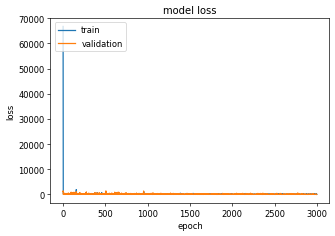

In [31]:
# "Loss"
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
# print the real values
actual_weight = y_text_df
actual_weight_gain=actual_weight.reset_index()
to_predict = X_text_df
# we call the predict method
predictions = model.predict(to_predict)
# print the predictions
predicted = pd.DataFrame(predictions)
predicted.rename(columns={0:'ANN Prediction'}, inplace=True)
# print(predicted)
Result = pd.concat([actual_weight_gain,predicted], axis =1, join='inner')
result = Result.drop('index',axis = 1)
print(result)

1/1 [==============================] - 0s 8ms/step
   Weight_gain  ANN Prediction
0   414.463400      411.335083
1   531.463400      530.173401
2   197.464130      196.110016
3    24.861800       23.034811
4   196.038000      193.453629
5    24.807600       24.536541
6   316.649783      323.791626
7    48.807600       47.412971


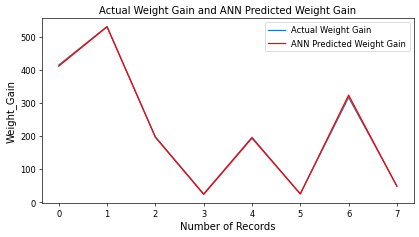

In [33]:
# visualize result of ANN prediction
plt.figure(figsize =(8,4))
plt.title('Actual Weight Gain and ANN Predicted Weight Gain')
plt.xlabel('Number of Records', fontsize = 12)
plt.ylabel('Weight_Gain', fontsize = 12)
plt.plot(Result['Weight_gain'])
plt.plot(Result['ANN Prediction'],'r')
plt.legend(['Actual Weight Gain','ANN Predicted Weight Gain'], loc = 'upper right')
plt.show()